In [36]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
# for feature encoding
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder, OneHotEncoder

# for all classifiers
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [207]:
df = pd.read_csv("heart.csv", skipinitialspace = True, skip_blank_lines=True, warn_bad_lines=True)

In [208]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


- age: The person's age in years
- sex: The person's sex (1 = male, 0 = female)
- cp: The chest pain experienced (Value 1: typical angina, Value 2: atypical angina, Value 3: non-anginal pain,Value 4: asymptomatic)
- trestbps: The person's resting blood pressure (mm Hg on admission to the hospital)
- chol: The person's cholesterol measurement in mg/dl
- fbs: The person's fasting blood sugar (> 120 mg/dl, 1 = true; 0 = false)
- restecg: Resting electrocardiographic measurement (0 = normal, 1 = having ST-T wave abnormality, 2 = showing probable or definite left ventricular hypertrophy by Estes' criteria)
- thalach: The person's maximum heart rate achieved
- exang: Exercise induced angina (1 = yes; 0 = no)
- oldpeak: ST depression induced by exercise relative to rest
- slope: the slope of the peak exercise ST segment (Value 1: upsloping, Value 2: flat, Value 3: downsloping)
- ca: The number of major vessels (0-3)
- thal: A blood disorder called thalassemia (3 = normal; 6 = fixed defect; 7 = reversable defect)
- target: Heart disease (0 = no, 1 = yes)

In [209]:
df.shape

(303, 14)

In [210]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [211]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [212]:
df[df.duplicated()]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


In [213]:
df.drop_duplicates(inplace=True)

In [214]:
df.shape

(302, 14)

In [215]:
df.nunique(axis=0)

age          41
sex           2
cp            4
trestbps     49
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            5
thal          4
target        2
dtype: int64

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'sex'}>,
        <AxesSubplot:title={'center':'cp'}>,
        <AxesSubplot:title={'center':'trestbps'}>],
       [<AxesSubplot:title={'center':'chol'}>,
        <AxesSubplot:title={'center':'fbs'}>,
        <AxesSubplot:title={'center':'restecg'}>,
        <AxesSubplot:title={'center':'thalach'}>],
       [<AxesSubplot:title={'center':'exang'}>,
        <AxesSubplot:title={'center':'oldpeak'}>,
        <AxesSubplot:title={'center':'slope'}>,
        <AxesSubplot:title={'center':'ca'}>],
       [<AxesSubplot:title={'center':'thal'}>,
        <AxesSubplot:title={'center':'target'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

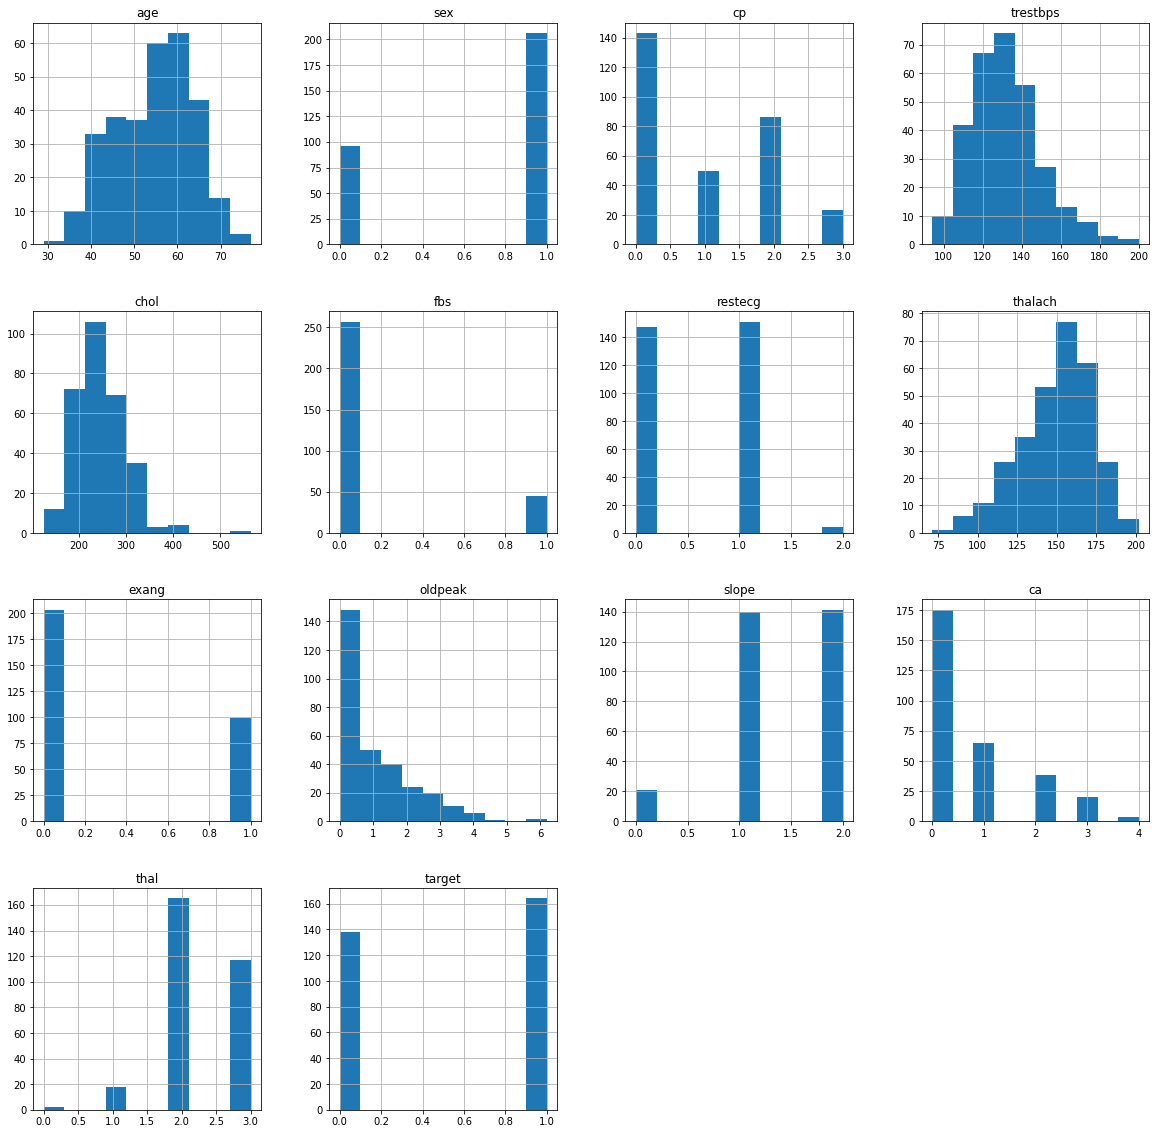

In [216]:
# Histogram/Distribution of data for each feature
df.hist(figsize=(20,20))

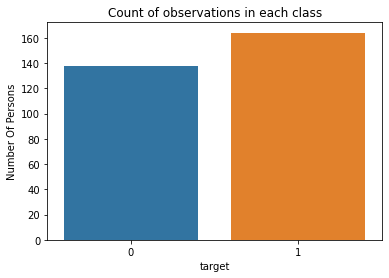

In [217]:
# Checking whether the given data set is balanced or not
sns.countplot(data=df, x='target')
plt.title("Count of observations in each class")
plt.ylabel("Number Of Persons")
plt.show()

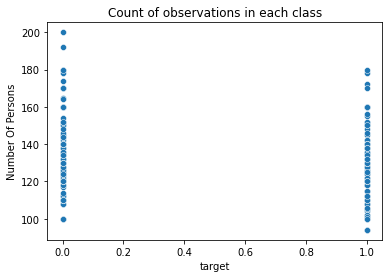

In [282]:
# Checking whether the given data set is balanced or not
sns.scatterplot(data=df,x='target', y='trestbps')
plt.title("Count of observations in each class")
plt.ylabel("Number Of Persons")
plt.show()

In [218]:
numerical_feat = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
categorical_feat = ['sex', 'fbs', 'exang', 'slope', 'ca', 'thal']
ordinal_feat = ['cp', 'restecg']

### Code for encoding features

In [219]:
copy_df = df.copy()

In [220]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [221]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [222]:
df = copy_df.copy()

In [223]:
le = LabelEncoder()
oe = OrdinalEncoder()
ohe = OneHotEncoder()
df[ordinal_feat] = oe.fit_transform(df[ordinal_feat])

In [224]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3.0,145,233,1,0.0,150,0,2.3,0,0,1,1
1,37,1,2.0,130,250,0,1.0,187,0,3.5,0,0,2,1
2,41,0,1.0,130,204,0,0.0,172,0,1.4,2,0,2,1
3,56,1,1.0,120,236,0,1.0,178,0,0.8,2,0,2,1
4,57,0,0.0,120,354,0,1.0,163,1,0.6,2,0,2,1


In [225]:
copy_df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [226]:
df['target'] = le.fit_transform(df['target'])

In [227]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3.0,145,233,1,0.0,150,0,2.3,0,0,1,1
1,37,1,2.0,130,250,0,1.0,187,0,3.5,0,0,2,1
2,41,0,1.0,130,204,0,0.0,172,0,1.4,2,0,2,1
3,56,1,1.0,120,236,0,1.0,178,0,0.8,2,0,2,1
4,57,0,0.0,120,354,0,1.0,163,1,0.6,2,0,2,1


In [228]:
categorical_feat

['sex', 'fbs', 'exang', 'slope', 'ca', 'thal']

In [229]:
# df[categorical_feat] = ohe.fit_transform(df[categorical_feat])

# df_ohe = pd.DataFrame(ohe.fit_transform(df[categorical_feat]).toarray())
# df_new=pd.concat([df,df_ohe],axis=1)
# df_new.head()

In [230]:
ohe_df = pd.get_dummies(df, columns=categorical_feat,drop_first=True,  sparse=True) #drop_first=True,
ohe_df.head()

,age,cp,trestbps,chol,restecg,thalach,oldpeak,target,sex_1,fbs_1,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,63,3.0,145,233,0.0,150,2.3,1,1,1,0,0,0,0,0,0,0,1,0,0
1,37,2.0,130,250,1.0,187,3.5,1,1,0,0,0,0,0,0,0,0,0,1,0
2,41,1.0,130,204,0.0,172,1.4,1,0,0,0,0,1,0,0,0,0,0,1,0
3,56,1.0,120,236,1.0,178,0.8,1,1,0,0,0,1,0,0,0,0,0,1,0
4,57,0.0,120,354,1.0,163,0.6,1,0,0,1,0,1,0,0,0,0,0,1,0


### Feature selection

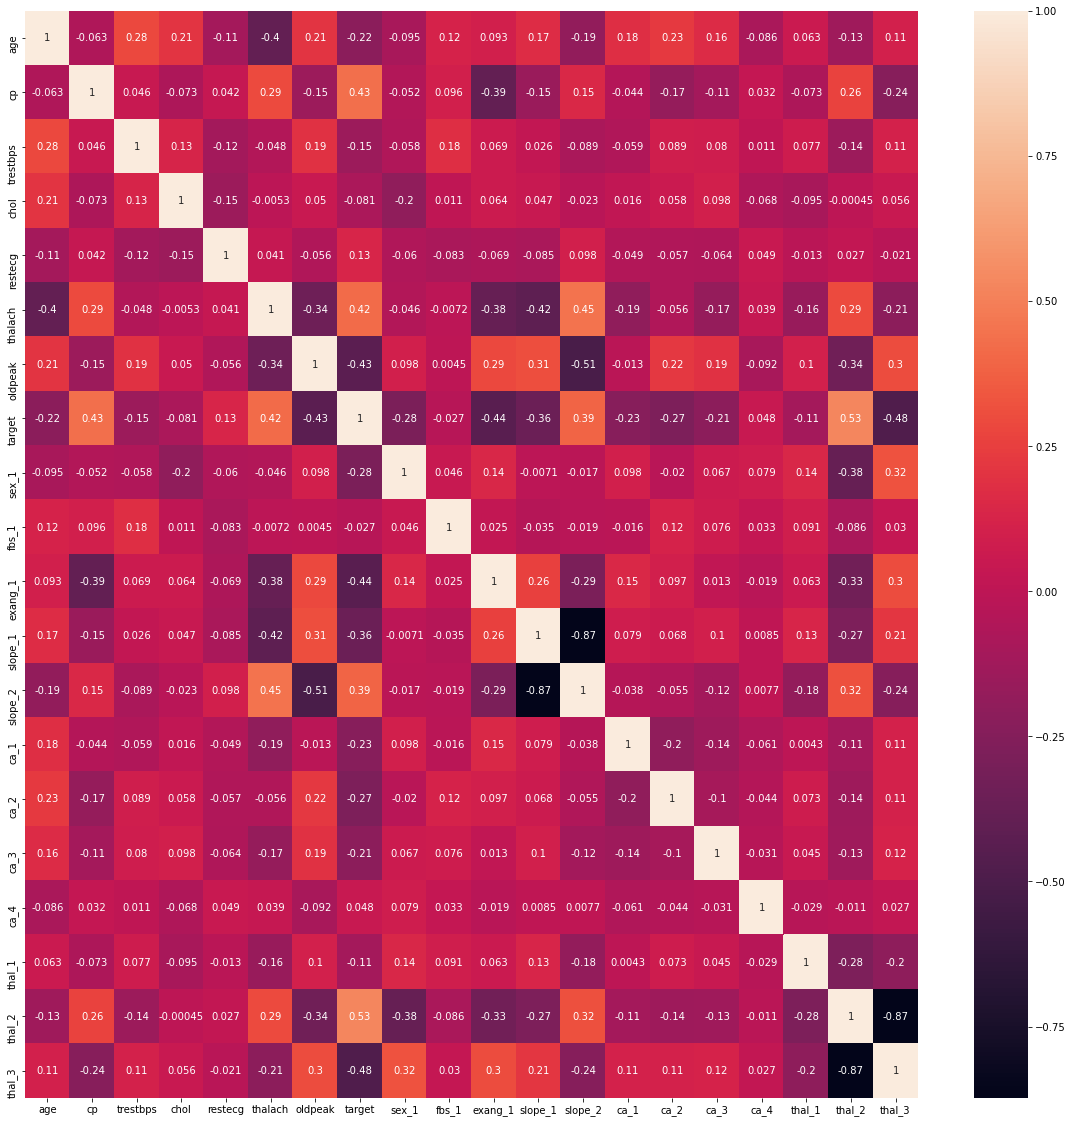

In [272]:
corr = ohe_df.corr()
corr_features = corr.index
plt.figure(figsize=(20,20))
g = sns.heatmap(ohe_df[corr_features].corr(), annot=True)

In [ ]:
X = ohe_df.drop(['target'], axis=1)
y = ohe_df['target']

In [274]:
ohe_df.shape

(302, 20)

[0.03806599 0.11146626 0.03497381 0.0459445  0.02977442 0.06786892
 0.12447628 0.02065275 0.0060238  0.05275593 0.03679203 0.02949323
 0.04434668 0.03236485 0.03025595 0.00029218 0.00827199 0.2820788
 0.00410163]


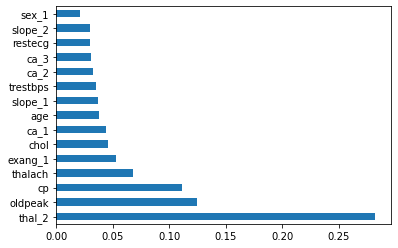

In [276]:
##### from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
model.fit(X,y)
print(model.feature_importances_)
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns) 
feat_importances.nlargest(15).plot(kind='barh')
plt.show()

In [277]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

#apply SelectKBest class to extract top best features
bestfeatures = SelectKBest(score_func=chi2, k=15)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(15,'Score'))  #print best features

      Specs      Score
1        cp  62.407105
18   thal_3  44.042734
9   exang_1  38.992367
17   thal_2  38.644796
11  slope_2  24.344639
10  slope_1  20.734272
13     ca_2  19.929660
14     ca_3  12.573725
12     ca_1  12.121841
6   oldpeak  11.548904
7     sex_1   8.018408
16   thal_1   3.247374
4   restecg   2.726629
5   thalach   2.627124
0       age   0.951304


### End of Feature selection

### For testing - we took chi2 test as feature selection

In [302]:
featureScores = featureScores.nlargest(15,'Score')
final_feat = featureScores['Specs'].tolist()

numerical_feat = ['age', 'thalach', 'oldpeak']


final_feat

['cp',
 'thal_3',
 'exang_1',
 'thal_2',
 'slope_2',
 'slope_1',
 'ca_2',
 'ca_3',
 'ca_1',
 'oldpeak',
 'sex_1',
 'thal_1',
 'restecg',
 'thalach',
 'age']

In [303]:
ohe_df_copy.head()

,age,cp,trestbps,chol,restecg,thalach,oldpeak,sex_1,fbs_1,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,63,3.0,145,233,0.0,150,2.3,1,1,0,0,0,0,0,0,0,1,0,0
1,37,2.0,130,250,1.0,187,3.5,1,0,0,0,0,0,0,0,0,0,1,0
2,41,1.0,130,204,0.0,172,1.4,0,0,0,0,1,0,0,0,0,0,1,0
3,56,1.0,120,236,1.0,178,0.8,1,0,0,0,1,0,0,0,0,0,1,0
4,57,0.0,120,354,1.0,163,0.6,0,0,1,0,1,0,0,0,0,0,1,0


In [304]:
# ohe_df_copy = ohe_df.copy()
ohe_df = ohe_df_copy.copy()

In [305]:
ohe_df = ohe_df[final_feat]

In [306]:
ohe_df.head()

,cp,thal_3,exang_1,thal_2,slope_2,slope_1,ca_2,ca_3,ca_1,oldpeak,sex_1,thal_1,restecg,thalach,age
0,3.0,0,0,0,0,0,0,0,0,2.3,1,1,0.0,150,63
1,2.0,0,0,1,0,0,0,0,0,3.5,1,0,1.0,187,37
2,1.0,0,0,1,1,0,0,0,0,1.4,0,0,0.0,172,41
3,1.0,0,0,1,1,0,0,0,0,0.8,1,0,1.0,178,56
4,0.0,0,1,1,1,0,0,0,0,0.6,0,0,1.0,163,57


In [298]:
# ohe_df.isna().sum()

In [307]:
ohe_df.shape

(302, 15)

## Verify the values for the feature 'ca' - (0-3) or (0-4)
### if ca=4 is anomoly we need to delete this data from df

In [232]:
#### Standardizing the features
def StandardizeFeatures(df):
    from sklearn.preprocessing import StandardScaler
    scaler = StandardScaler() 
    scaled_data = scaler.fit_transform(df)
    std_df = pd.DataFrame(scaled_data)
#     new_df.head()
    print(scaler.mean_)
    return std_df

In [233]:
def MinMaxScaling(df):
        """
        This method normalizes the Numerical feature values on the scale of 0 to 1
        """
        from sklearn.preprocessing import MinMaxScaler
        x_scaler = MinMaxScaler()        
        for col in df.columns:
            df[col] = pd.to_numeric(df[col], errors='coerce')
#            if df[col].max() > 1:
            df[col] = pd.DataFrame(x_scaler.fit_transform(pd.DataFrame(df[col])),columns=[col])

        return df

In [234]:
from sklearn.preprocessing import MinMaxScaler
# MinMaxScaler?

In [308]:
numerical_feat

['age', 'thalach', 'oldpeak']

In [309]:
std_df = ohe_df.copy()

In [254]:
# ohe_df['age'].describe()

In [255]:
std_df.isna().sum()

age         0
cp          0
trestbps    0
chol        0
restecg     0
thalach     0
oldpeak     0
target      0
sex_1       0
fbs_1       0
exang_1     0
slope_1     0
slope_2     0
ca_1        0
ca_2        0
ca_3        0
ca_4        0
thal_1      0
thal_2      0
thal_3      0
dtype: int64

In [256]:
# std_df[numerical_feat] = StandardizeFeatures(std_df[numerical_feat])
# std_df.head()

In [257]:
std_df.tail()

,age,cp,trestbps,chol,restecg,thalach,oldpeak,target,sex_1,fbs_1,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
298,57,0.0,140,241,1.0,123,0.2,0,0,0,1,1,0,0,0,0,0,0,0,1
299,45,3.0,110,264,1.0,132,1.2,0,1,0,0,1,0,0,0,0,0,0,0,1
300,68,0.0,144,193,1.0,141,3.4,0,1,1,0,1,0,0,1,0,0,0,0,1
301,57,0.0,130,131,1.0,115,1.2,0,1,0,1,1,0,1,0,0,0,0,0,1
302,57,1.0,130,236,0.0,174,0.0,0,0,0,0,1,0,1,0,0,0,0,1,0


In [310]:
std_df[numerical_feat] = MinMaxScaling(std_df[numerical_feat])
std_df.tail()

,cp,thal_3,exang_1,thal_2,slope_2,slope_1,ca_2,ca_3,ca_1,oldpeak,sex_1,thal_1,restecg,thalach,age
298,0.0,1,1,0,0,1,0,0,0,0.193548,0,0,1.0,0.465649,0.333333
299,3.0,1,0,0,0,1,0,0,0,0.548387,1,0,1.0,0.534351,0.812500
300,0.0,1,0,0,0,1,1,0,0,0.193548,1,0,1.0,0.335878,0.583333
301,0.0,1,1,0,0,1,0,0,1,0.000000,1,0,1.0,0.786260,0.583333
302,1.0,0,0,1,0,1,0,0,1,NaN,0,0,0.0,NaN,NaN


In [313]:
std_df.dropna(how = 'any', inplace = True, axis=0)
std_df.tail()

,cp,thal_3,exang_1,thal_2,slope_2,slope_1,ca_2,ca_3,ca_1,oldpeak,sex_1,thal_1,restecg,thalach,age
297,0.0,0,0,0,0,1,1,0,0,0.032258,1,1,0.0,0.396947,0.583333
298,0.0,1,1,0,0,1,0,0,0,0.193548,0,0,1.0,0.465649,0.333333
299,3.0,1,0,0,0,1,0,0,0,0.548387,1,0,1.0,0.534351,0.812500
300,0.0,1,0,0,0,1,1,0,0,0.193548,1,0,1.0,0.335878,0.583333
301,0.0,1,1,0,0,1,0,0,1,0.000000,1,0,1.0,0.786260,0.583333


In [244]:
# std_df.to_csv('converted_dataset.csv')

In [312]:
std_df.isna().sum()

cp         0
thal_3     0
exang_1    0
thal_2     0
slope_2    0
slope_1    0
ca_2       0
ca_3       0
ca_1       0
oldpeak    1
sex_1      0
thal_1     0
restecg    0
thalach    1
age        1
dtype: int64

In [261]:
# std_df['age'].describe()

In [262]:
# std_df['age'].isna()

In [263]:
# std_df['trestbps'].isna()

In [264]:
# std_df['chol'].isna()

In [315]:
X = std_df  #.drop(['target'], axis=1)
# y = std_df['target']

In [316]:
X.head()

,cp,thal_3,exang_1,thal_2,slope_2,slope_1,ca_2,ca_3,ca_1,oldpeak,sex_1,thal_1,restecg,thalach,age
0,3.0,0,0,0,0,0,0,0,0,0.370968,1,1,0.0,0.603053,0.708333
1,2.0,0,0,1,0,0,0,0,0,0.564516,1,0,1.0,0.885496,0.166667
2,1.0,0,0,1,1,0,0,0,0,0.225806,0,0,0.0,0.770992,0.250000
3,1.0,0,0,1,1,0,0,0,0,0.129032,1,0,1.0,0.816794,0.562500
4,0.0,0,1,1,1,0,0,0,0,0.096774,0,0,1.0,0.702290,0.583333


In [317]:
X.isna().sum()

cp         0
thal_3     0
exang_1    0
thal_2     0
slope_2    0
slope_1    0
ca_2       0
ca_3       0
ca_1       0
oldpeak    0
sex_1      0
thal_1     0
restecg    0
thalach    0
age        0
dtype: int64

### Classifiers

In [251]:
def runClassifiers(X,y):
    classifiers = [
        KNeighborsClassifier(n_neighbors=3 , metric='minkowski', p=2),
        DecisionTreeClassifier(criterion='entropy', random_state=0),
        RandomForestClassifier(n_estimators=15 , criterion='entropy', random_state=0),
        LogisticRegression(random_state=0)]
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=13)
    
    print("************************ CLASSIFICATION REPORT FOR DIFFERENT CLASSIFIERS ************************ ")        
    print("\n----------------------------------------------------------------------------------------------")
    print("| {0:^25}".format("Classifier Model"), end="\t")
    print("| {0:^10}".format("Precision"), end="\t")
    print("| {0:^10}".format("Recall"), end="\t")
    print("| {0:^10}".format("F1-Score"), end="\t")
    print("| {0:^10}".format("Accuracy(%)"), end="\n")
    print("----------------------------------------------------------------------------------------------")
    
    for clf in classifiers:
        clf.fit(X_train, y_train)
        name = clf.__class__.__name__
        y_pred = clf.predict(X_test)
        error = []
        error.append(np.mean(y_pred != y_test))
            
        class_report = classification_report(y_test, y_pred, output_dict= True)
        acc = accuracy_score(y_test, y_pred)
        
        print("| {0:^25}".format(name), end="\t")
        print("| {0:^10}".format(round(class_report['0']['precision'],2)), end="\t")
        print("| {0:^10}".format(round(class_report['0']['recall'],2)), end="\t")
        print("| {0:^10}".format(round(class_report['0']['f1-score'],2)), end="\t")
        print("| {:.2%}".format( round(acc,2)), end="\n")
            

In [318]:
runClassifiers(X,y)

************************ CLASSIFICATION REPORT FOR DIFFERENT CLASSIFIERS ************************ 

----------------------------------------------------------------------------------------------
|     Classifier Model     	| Precision 	|   Recall  	|  F1-Score 	| Accuracy(%)
----------------------------------------------------------------------------------------------
|   KNeighborsClassifier   	|    0.85   	|    0.8    	|    0.83   	| 85.00%
|  DecisionTreeClassifier  	|    0.76   	|    0.85   	|    0.8    	| 81.00%
|  RandomForestClassifier  	|    0.79   	|    0.9    	|    0.84   	| 85.00%
|    LogisticRegression    	|    0.79   	|    0.8    	|    0.8    	| 81.00%
